In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Importing Data

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Understanding Dataset

In [3]:
display(train.shape)
display(test.shape)

(50882, 14)

(21805, 13)

In [4]:
train.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


In [5]:
test.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,50883,C1,156,Owned,Individual,30,30,No,NaN,6.0,3.0,5,11934.0
1,50884,C4,7,Owned,Joint,69,68,Yes,X1,3.0,3.0,18,32204.8
2,50885,C1,564,Rented,Individual,28,28,No,X3,2.0,4.0,17,9240.0
3,50886,C3,1177,Rented,Individual,23,23,No,X3,3.0,3.0,18,9086.0
4,50887,C1,951,Owned,Individual,75,75,No,X3,NaN,NaN,5,22534.0



# Describing dataset


In [35]:
 train.describe()

,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
count,50882.000000,50882.000000,30631.000000,50882.000000,50882.000000,50882.000000
mean,44.856275,42.738866,2.439228,15.115188,14183.950069,0.239947
std,17.310271,17.319375,1.025923,6.340663,6590.074873,0.427055
min,18.000000,16.000000,1.000000,1.000000,2280.000000,0.000000
25%,28.000000,27.000000,1.000000,12.000000,9248.000000,0.000000
50%,44.000000,40.000000,3.000000,17.000000,13178.000000,0.000000
75%,59.000000,57.000000,3.000000,20.000000,18096.000000,0.000000
max,75.000000,75.000000,4.000000,22.000000,43350.400000,1.000000


In [38]:
test.describe()

,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
count,21805.000000,21805.000000,13202.000000,21805.000000,21805.000000
mean,44.877734,42.748085,2.440085,15.138363,14220.306581
std,17.254898,17.269112,1.037627,6.302805,6497.996164
min,18.000000,16.000000,1.000000,1.000000,2152.000000
25%,28.000000,27.000000,1.000000,12.000000,9285.000000
50%,44.000000,41.000000,3.000000,17.000000,13244.000000
75%,59.000000,57.000000,3.000000,20.000000,18201.600000
max,75.000000,75.000000,4.000000,22.000000,43776.000000


In [7]:
train.columns

Index(['ID', 'City_Code', 'Region_Code', 'Accomodation_Type',
       'Reco_Insurance_Type', 'Upper_Age', 'Lower_Age', 'Is_Spouse',
       'Health Indicator', 'Holding_Policy_Duration', 'Holding_Policy_Type',
       'Reco_Policy_Cat', 'Reco_Policy_Premium', 'Response'],
      dtype='object')

In [30]:
test.columns

Index(['ID', 'City_Code', 'Region_Code', 'Accomodation_Type',
       'Reco_Insurance_Type', 'Upper_Age', 'Lower_Age', 'Is_Spouse',
       'Health Indicator', 'Holding_Policy_Duration', 'Holding_Policy_Type',
       'Reco_Policy_Cat', 'Reco_Policy_Premium'],
      dtype='object')

In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Accomodation_Type        50882 non-null  object 
 1   Reco_Insurance_Type      50882 non-null  object 
 2   Upper_Age                50882 non-null  int64  
 3   Lower_Age                50882 non-null  int64  
 4   Is_Spouse                50882 non-null  object 
 5   Health Indicator         39191 non-null  object 
 6   Holding_Policy_Duration  30631 non-null  object 
 7   Holding_Policy_Type      30631 non-null  float64
 8   Reco_Policy_Cat          50882 non-null  int64  
 9   Reco_Policy_Premium      50882 non-null  float64
 10  Response                 50882 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 4.3+ MB


In [10]:
train.nunique()

ID                         50882
City_Code                     36
Region_Code                 5316
Accomodation_Type              2
Reco_Insurance_Type            2
Upper_Age                     58
Lower_Age                     60
Is_Spouse                      2
Health Indicator               9
Holding_Policy_Duration       15
Holding_Policy_Type            4
Reco_Policy_Cat               22
Reco_Policy_Premium         6977
Response                       2
dtype: int64

In [32]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21805 entries, 0 to 21804
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       21805 non-null  int64  
 1   City_Code                21805 non-null  object 
 2   Region_Code              21805 non-null  int64  
 3   Accomodation_Type        21805 non-null  object 
 4   Reco_Insurance_Type      21805 non-null  object 
 5   Upper_Age                21805 non-null  int64  
 6   Lower_Age                21805 non-null  int64  
 7   Is_Spouse                21805 non-null  object 
 8   Health Indicator         16778 non-null  object 
 9   Holding_Policy_Duration  13202 non-null  object 
 10  Holding_Policy_Type      13202 non-null  float64
 11  Reco_Policy_Cat          21805 non-null  int64  
 12  Reco_Policy_Premium      21805 non-null  float64
dtypes: float64(2), int64(5), object(6)
memory usage: 2.2+ MB


In [33]:
test.nunique()

ID                         21805
City_Code                     36
Region_Code                 4694
Accomodation_Type              2
Reco_Insurance_Type            2
Upper_Age                     58
Lower_Age                     60
Is_Spouse                      2
Health Indicator               9
Holding_Policy_Duration       15
Holding_Policy_Type            4
Reco_Policy_Cat               22
Reco_Policy_Premium         5226
dtype: int64

In [9]:
train.count()

ID                         50882
City_Code                  50882
Region_Code                50882
Accomodation_Type          50882
Reco_Insurance_Type        50882
Upper_Age                  50882
Lower_Age                  50882
Is_Spouse                  50882
Health Indicator           39191
Holding_Policy_Duration    30631
Holding_Policy_Type        30631
Reco_Policy_Cat            50882
Reco_Policy_Premium        50882
Response                   50882
dtype: int64

In [11]:
#counting null values
train.isnull().sum()

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

In [34]:
test.isnull().sum()

ID                            0
City_Code                     0
Region_Code                   0
Accomodation_Type             0
Reco_Insurance_Type           0
Upper_Age                     0
Lower_Age                     0
Is_Spouse                     0
Health Indicator           5027
Holding_Policy_Duration    8603
Holding_Policy_Type        8603
Reco_Policy_Cat               0
Reco_Policy_Premium           0
dtype: int64

In [14]:
# Dropping data which are not needed
train = train.drop(['ID','City_Code','Region_Code'], axis =1)

KeyError: "['ID' 'City_Code' 'Region_Code'] not found in axis"

In [37]:
test = test.drop(['ID','City_Code','Region_Code'], axis =1)

In [15]:
train.head()

,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


In [16]:
train.columns

Index(['Accomodation_Type', 'Reco_Insurance_Type', 'Upper_Age', 'Lower_Age',
       'Is_Spouse', 'Health Indicator', 'Holding_Policy_Duration',
       'Holding_Policy_Type', 'Reco_Policy_Cat', 'Reco_Policy_Premium',
       'Response'],
      dtype='object')

<AxesSubplot:>

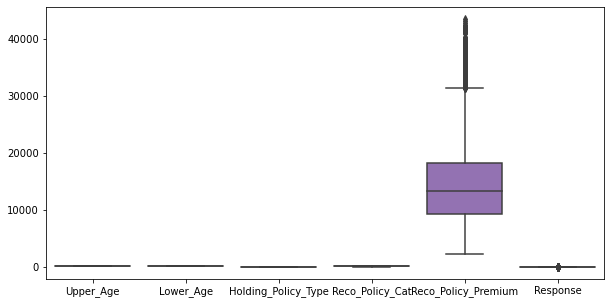

In [97]:
#finding out outliers
plt.figure(figsize=(10,5))
sns.boxplot(data = train)

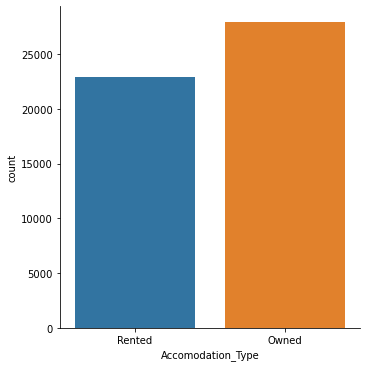

In [17]:
#Accomodation_type plot
sns.catplot(x ='Accomodation_Type',data = train,kind = 'count')

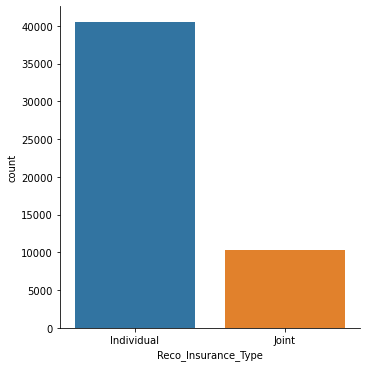

In [36]:
#'Reco_Insurance_Type plot
sns.catplot(x = 'Reco_Insurance_Type', data = train, kind = 'count')

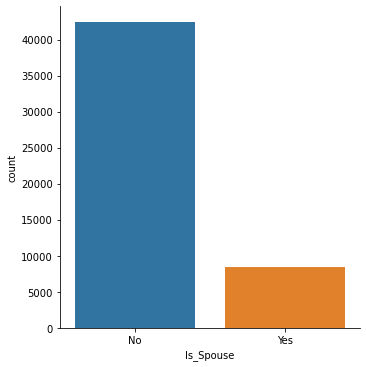

In [18]:
#'Is_spouce'plot
sns.catplot(x = 'Is_Spouse', data = train , kind = 'count')

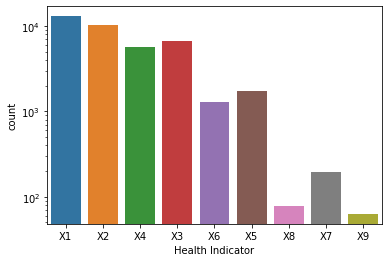

In [23]:
# health incator count plot
sns.countplot(x = 'Health Indicator', data = train)
plt.yscale('log')

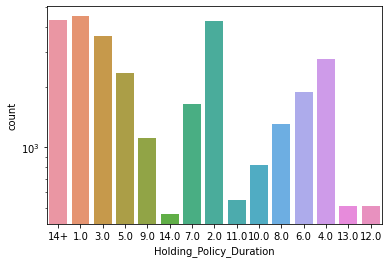

In [61]:
#counting out holdong policies duration
sns.countplot(x ='Holding_Policy_Duration' , data = train)
plt.yscale('log')

<AxesSubplot:xlabel='Holding_Policy_Type', ylabel='count'>

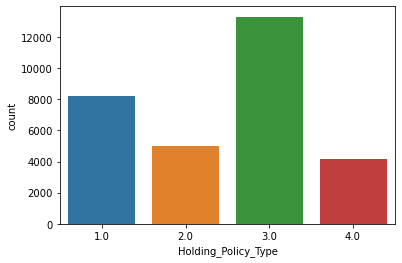

In [44]:
#counting out holdong policies type we have 4 type
sns.countplot(x ='Holding_Policy_Type' , data = train)

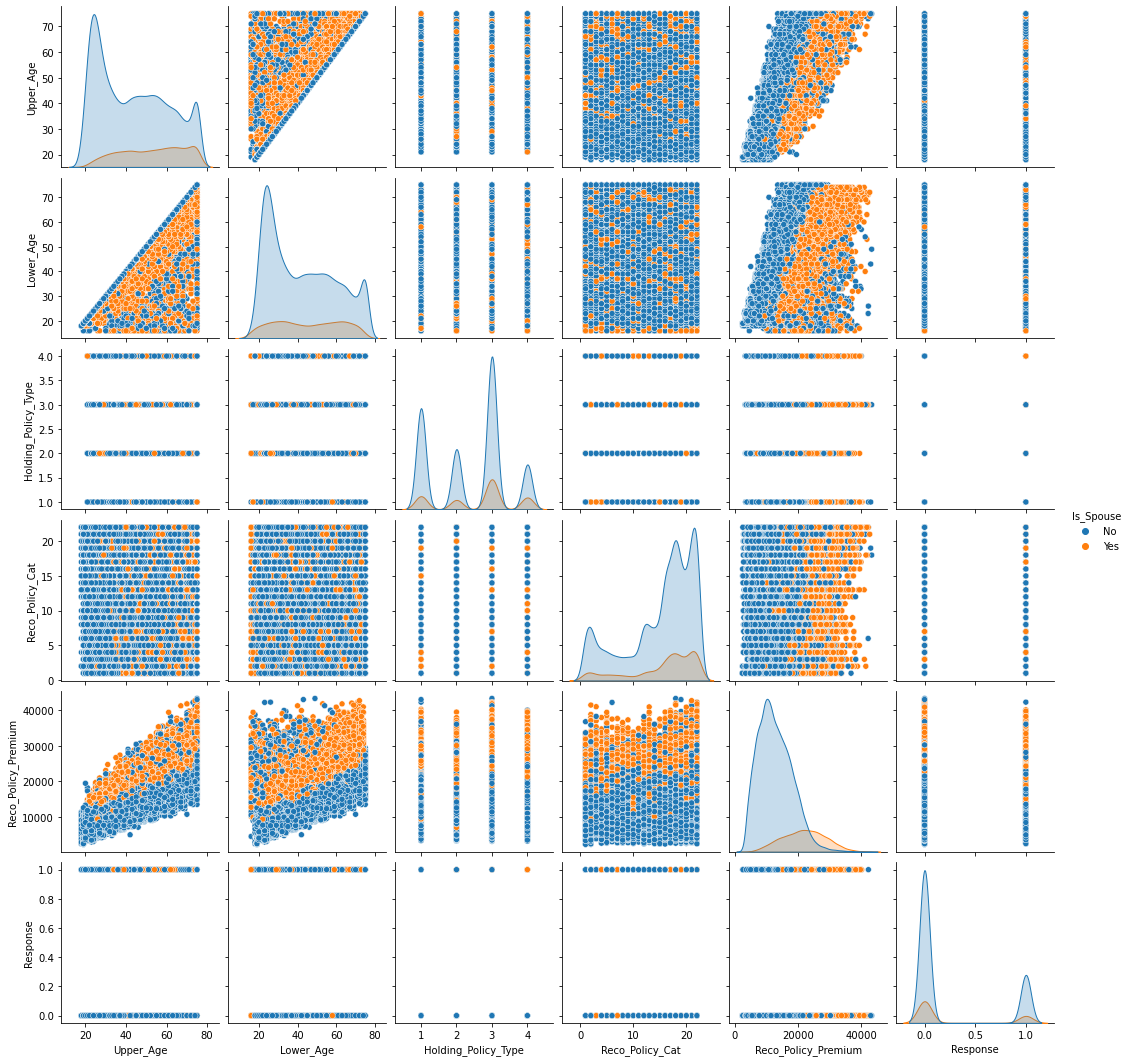

In [91]:
#plotting a pairplot with the hue of Is_spouce
sns.pairplot(train, hue = 'Is_Spouse')

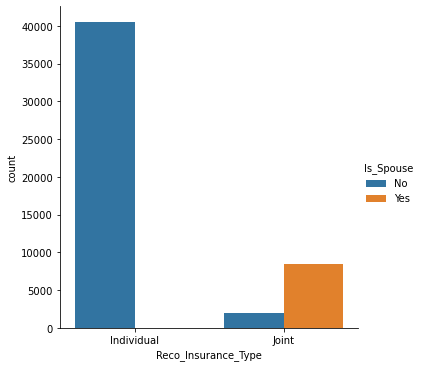

In [44]:
#countplot for insurance type and relating it with Is_spouse
sns.catplot(x = 'Reco_Insurance_Type', data = train,hue = 'Is_Spouse', kind = 'count' , height=5)

<AxesSubplot:ylabel='Reco_Policy_Premium'>

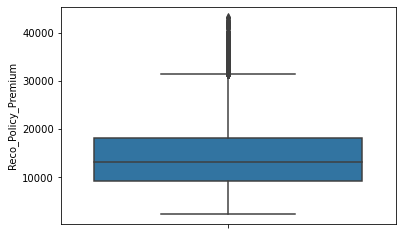

In [98]:
#Reco_Policy_Premium boxplot for outliers
sns.boxplot(y='Reco_Policy_Premium',data = train)

<AxesSubplot:xlabel='Reco_Insurance_Type', ylabel='Reco_Policy_Premium'>

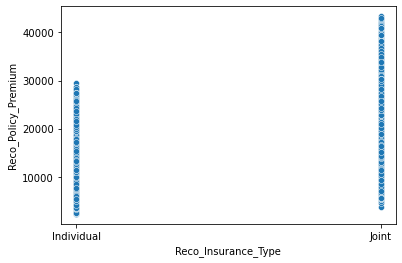

In [75]:
#Reco_Policy_Premium scatterplot for outliers
sns.scatterplot(y='Reco_Policy_Premium',x='Reco_Insurance_Type',data = train)

<AxesSubplot:xlabel='Response', ylabel='count'>

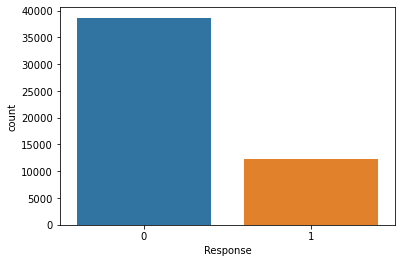

In [92]:
#responce given by the customers for the new health insurance policy
sns.countplot(x= 'Response', data = train)